# Q-Q Plot

## Preparation


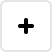
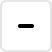
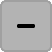
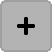
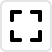
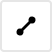
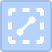
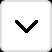
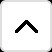
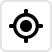

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, skewnorm, laplace, uniform, t, gamma, expon, chi2

from lets_plot import *
LetsPlot.setup_html()

In [2]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [3]:
qq_labs = labs(x="theoretical quantiles", y="sample quantiles")

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
print(df.shape)
target_column = "hwy"
grouping_column = "drv"
print("Target column: {0}\nGrouping column: {1}".format(target_column, grouping_column))
df.head()

(234, 12)
Target column: hwy
Grouping column: drv


Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

In [5]:
n, big_n = 500, 5_001
norm_df = pd.DataFrame({"y": norm.rvs(size=n, random_state=42)})
uniform_df = pd.DataFrame({"y": uniform.rvs(size=n, random_state=42)})
t_df = pd.DataFrame({"y": t.rvs(1, size=n, random_state=42)})
gamma_df = pd.DataFrame({"y": gamma.rvs(1, size=n, random_state=42)})
exp_df = pd.DataFrame({"y": expon.rvs(size=n, random_state=42)})
skewed_df = pd.DataFrame({"y": skewnorm.rvs(7, size=n, random_state=42)})
neg_kurtosis_df = pd.DataFrame({"y": uniform.rvs(size=n, random_state=42)})
pos_kurtosis_df = pd.DataFrame({"y": laplace.rvs(size=n, random_state=42)})
big_norm_df = pd.DataFrame({"y": norm.rvs(size=big_n, random_state=42)})
big_uniform_df = pd.DataFrame({"y": uniform.rvs(size=big_n, random_state=42)})
big_t_df = pd.DataFrame({"y": t.rvs(1, size=big_n, random_state=42)})
big_gamma_df = pd.DataFrame({"y": gamma.rvs(1, size=big_n, random_state=42)})
big_exp_df = pd.DataFrame({"y": expon.rvs(size=big_n, random_state=42)})
big_chi2_df = pd.DataFrame({"y": chi2.rvs(1, size=big_n, random_state=42)})

In [6]:
def qq_stat(input_df, column, dist="norm"):
    distributions = {
        "norm": {
            "d": norm,
            "p": [],
        },
        "uniform": {
            "d": uniform,
            "p": [],
        },
        "t": {
            "d": t,
            "p": [1],
        },
        "gamma": {
            "d": gamma,
            "p": [1],
        },
        "expon": {
            "d": expon,
            "p": [],
        },
        "chi2": {
            "d": chi2,
            "p": [1],
        },
    }

    n = input_df[column].size
    x = (np.arange(1, n + 1) - .5) / n
    stat_x = distributions[dist]["d"].ppf(x, *distributions[dist]["p"])
    stat_y = input_df[column].sort_values(ignore_index=True)

    return pd.DataFrame({"x": stat_x, "y": stat_y})

identity_df = qq_stat(df, target_column)
identity_df.head()

x   y
0 -2.857234  12
1 -2.488717  12
2 -2.301427  12
3 -2.171220  12
4 -2.069902  12

## Default

In [21]:
ggplot(df, aes(y=target_column)) + geom_qq()

## Deviations investigation

In [18]:
p1 = ggplot(norm_df)
p11 = p1 + geom_histogram(aes(x="y")) + ggtitle("Normal: histogram")
p12 = p1 + geom_qq(aes(y="y")) + qq_labs + ggtitle("Normal: Q-Q plot")
p2 = ggplot(skewed_df)
p21 = p2 + geom_histogram(aes(x="y")) + ggtitle("Skewed: histogram")
p22 = p2 + geom_qq(aes(y="y")) + qq_labs + ggtitle("Skewed: Q-Q plot")
p3 = ggplot(neg_kurtosis_df)
p31 = p3 + geom_histogram(aes(x="y")) + ggtitle("-Kurtosis: histogram")
p32 = p3 + geom_qq(aes(y="y")) + qq_labs + ggtitle("-Kurtosis: Q-Q plot")
p4 = ggplot(pos_kurtosis_df)
p41 = p4 + geom_histogram(aes(x="y")) + ggtitle("+Kurtosis: histogram")
p42 = p4 + geom_qq(aes(y="y")) + qq_labs + ggtitle("+Kurtosis: Q-Q plot")

w, h = 400, 300
bunch = GGBunch()
bunch.add_plot(p11, 0, 0, w, h)
bunch.add_plot(p12, w, 0, w, h)
bunch.add_plot(p21, 0, h, w, h)
bunch.add_plot(p22, w, h, w, h)
bunch.add_plot(p31, 0, 2 * h, w, h)
bunch.add_plot(p32, w, 2 * h, w, h)
bunch.add_plot(p41, 0, 3 * h, w, h)
bunch.add_plot(p42, w, 3 * h, w, h)
bunch.show()

## Parameters

### `distribution`

In [9]:
p1 = ggplot(norm_df, aes(y="y"))
p11 = p1 + geom_qq(distribution="norm") + qq_labs + ggtitle("normal/normal")
p12 = p1 + geom_qq(distribution="uniform") + qq_labs + ggtitle("uniform/normal")
p13 = p1 + geom_qq(distribution="t") + qq_labs + ggtitle("t/normal")
p14 = p1 + geom_qq(distribution="exp") + qq_labs + ggtitle("exp/normal")
p2 = ggplot(uniform_df, aes(y="y"))
p21 = p2 + geom_qq(distribution="norm") + qq_labs + ggtitle("normal/uniform")
p22 = p2 + geom_qq(distribution="uniform") + qq_labs + ggtitle("uniform/uniform")
p23 = p2 + geom_qq(distribution="t") + qq_labs + ggtitle("t/uniform")
p24 = p2 + geom_qq(distribution="exp") + qq_labs + ggtitle("exp/uniform")
p3 = ggplot(t_df, aes(y="y"))
p31 = p3 + geom_qq(distribution="norm") + qq_labs + ggtitle("normal/t")
p32 = p3 + geom_qq(distribution="uniform") + qq_labs + ggtitle("uniform/t")
p33 = p3 + geom_qq(distribution="t") + qq_labs + ggtitle("t/t")
p34 = p3 + geom_qq(distribution="exp") + qq_labs + ggtitle("exp/t")
p4 = ggplot(exp_df, aes(y="y"))
p41 = p4 + geom_qq(distribution="norm") + qq_labs + ggtitle("normal/exp")
p42 = p4 + geom_qq(distribution="uniform") + qq_labs + ggtitle("uniform/exp")
p43 = p4 + geom_qq(distribution="t") + qq_labs + ggtitle("t/exp")
p44 = p4 + geom_qq(distribution="exp") + qq_labs + ggtitle("exp/exp")

w, h = 240, 180
bunch = GGBunch()
bunch.add_plot(p11, 0, 0, w, h)
bunch.add_plot(p12, w, 0, w, h)
bunch.add_plot(p13, 2 * w, 0, w, h)
bunch.add_plot(p14, 3 * w, 0, w, h)
bunch.add_plot(p21, 0, h, w, h)
bunch.add_plot(p22, w, h, w, h)
bunch.add_plot(p23, 2 * w, h, w, h)
bunch.add_plot(p24, 3 * w, h, w, h)
bunch.add_plot(p31, 0, 2 * h, w, h)
bunch.add_plot(p32, w, 2 * h, w, h)
bunch.add_plot(p33, 2 * w, 2 * h, w, h)
bunch.add_plot(p34, 3 * w, 2 * h, w, h)
bunch.add_plot(p41, 0, 3 * h, w, h)
bunch.add_plot(p42, w, 3 * h, w, h)
bunch.add_plot(p43, 2 * w, 3 * h, w, h)
bunch.add_plot(p44, 3 * w, 3 * h, w, h)
bunch.show()

### `dparams`

In [10]:
alpha = [1, 5]
beta = [1, 5]

p = ggplot(gamma_df, aes(y="y"))
p1 = p + geom_qq(distribution="gamma", dparams=[alpha[0], beta[0]]) + \
    qq_labs + ggtitle("alpha={alpha}, beta={beta} (default)".format(alpha=alpha[0], beta=beta[0]))
p2 = p + geom_qq(distribution="gamma", dparams=[alpha[0], beta[1]]) + \
    qq_labs + ggtitle("alpha={alpha}, beta={beta}".format(alpha=alpha[0], beta=beta[1]))
p3 = p + geom_qq(distribution="gamma", dparams=[alpha[1], beta[0]]) + \
    qq_labs + ggtitle("alpha={alpha}, beta={beta}".format(alpha=alpha[1], beta=beta[0]))
p4 = p + geom_qq(distribution="gamma", dparams=[alpha[1], beta[1]]) + \
    qq_labs + ggtitle("alpha={alpha}, beta={beta}".format(alpha=alpha[1], beta=beta[1]))

w, h = 400, 300
bunch = GGBunch()
bunch.add_plot(p1, 0, 0, w, h)
bunch.add_plot(p2, w, 0, w, h)
bunch.add_plot(p3, 0, h, w, h)
bunch.add_plot(p4, w, h, w, h)
bunch.show()

### Other parameters

In [11]:
ggplot(df, aes(y=target_column)) + \
    geom_qq(aes(fill=grouping_column), shape=23, color='black', size=3, \
            tooltips=layer_tooltips().title("Drive type: @{{{0}}}".format(grouping_column))\
                                     .line("(^x, ^y)")) + \
    qq_labs

## Interaction with other layers

In [12]:
ggplot(df, aes(y=target_column)) + \
    geom_qq(aes(color=grouping_column)) + qq_labs + \
    scale_color_brewer(type='qual', palette="Set1") + \
    facet_grid(x=grouping_column)

In [13]:
ggplot(df, aes(y=target_column)) + \
    geom_qq() + qq_labs + \
    coord_fixed(ratio=5, flip=True) + \
    theme_classic()

## "identity" statistic

In [19]:
ggplot() + \
    geom_qq(aes("x", "y"), data=identity_df, stat='identity', shape=1, size=4, color="#08519c") + \
    geom_qq(aes(y=target_column), data=df, shape=3, size=3, color="#de2d26")

## Regression tests

### Small or empty datasets

In [15]:
tests = [
    {
        'data': {
            'y': [0],
        },
        'stat': 'qq',
        'title': "One element in data",
    },
    {
        'data': {
            'y': [0, np.nan],
        },
        'stat': 'qq',
        'title': "Nan's in data",
    },
    {
        'data': {
            'y': [-1, 0, 1],
        },
        'stat': 'qq',
        'title': "x's should be [-0.97, 0.0, 0.97]",
    },
    {
        'data': {
            'x': [],
            'y': [],
        },
        'stat': 'identity',
        'title': "Empty data, stat='identity'",
    },
    {
        'data': {
            'x': [0],
            'y': [0],
        },
        'stat': 'identity',
        'title': "One row in data, stat='identity'",
    },
    {
        'data': {
            'x': [0, np.nan, 0],
            'y': [np.nan, 0, 0],
        },
        'stat': 'identity',
        'title': "Nan's in data, stat='identity'",
    },
]

plot_matrix([
    ggplot(test['data'], aes(y='y') if test['stat'] == 'qq' else aes('x', 'y')) + \
        geom_qq(stat=test['stat']) + \
        ggtitle(test['title'])
    for test in tests
])

### Big datasets

In [16]:
tests = [
    {
        'data': big_norm_df,
        'dist': "norm",
        'title': "Normal distribution",
    },
    {
        'data': big_uniform_df,
        'dist': "uniform",
        'title': "Uniform distribution",
    },
    {
        'data': big_t_df,
        'dist': "t",
        'title': "t-Student distribution",
    },
    {
        'data': big_gamma_df,
        'dist': "gamma",
        'title': "Gamma distribution",
    },
    {
        'data': big_exp_df,
        'dist': "exp",
        'title': "Exponential distribution",
    },
    {
        'data': big_chi2_df,
        'dist': "chi2",
        'title': "Chi-squared distribution",
    },
]

plot_matrix([
    ggplot(test['data'], aes(y='y')) + geom_qq(distribution=test['dist']) + qq_labs + ggtitle(test['title'])
    for test in tests
])